In [1]:
# εγκατάσταση απαραίτητων πακέτων
using Pkg
Pkg.add(["Plots", "Distributions", "ImageFiltering"])

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed PlotThemes ────── v1.0.3
  Installed RecipesPipeline ─ v0.1.11
  Installed Plots ─────────── v1.0.14
  Installed PlotUtils ─────── v0.6.5
  Installed ImageFiltering ── v0.6.13
   Updating `~/workspace/Thesis/Project.toml`
  [6a3955dd] + ImageFiltering v0.6.13
  [91a5bcdd] + Plots v1.0.14
   Updating `~/workspace/Thesis/Manifest.toml`
  [6e34b625] + Bzip2_jll v1.0.6+2
  [c87230d0] + FFMPEG v0.3.0
  [b22a6f82] + FFMPEG_jll v4.1.0+3
  [d7e528f0] + FreeType2_jll v2.10.1+2
  [559328eb] + FriBidi_jll v1.0.5+3
  [28b8d3ca] + GR v0.48.0
  [4d00f742] + GeometryTypes v0.8.3
  [6a3955dd] ↑ ImageFiltering v0.6.11 ⇒ v0.6.13
  [aacddb02] ↑ JpegTurbo_jll v2.0.1+0 ⇒ v2.0.1+1
  [c1c5ebd0] + LAME_jll v3.100.0+1
  [dd192d2f] + LibVPX_jll v1.8.1+1
  [442fdcdd] + Measures v0.3.1
  [e7412a2a] + Ogg_jll v1.3.4+0
  [458c3c95] + OpenSSL_jll v1.1.1+4
  [91d4177d] + Opus_jll v1.3.1+1
  [ccf2f8ad] + PlotThemes v1.0.3
  [995b91a9] + PlotUtils v0.6.5
  [91a5bcdd] + Plots 

# Τυχαίος Περίπατος

In [7]:
# Απαραίτητα Πακέτα
using Distributions, Plots

### random_walk1d

In [4]:
function random_walk1d(timesteps)
    previous_position::Float64 = 0
    positions::Array{Float64,1} = []
    #= κάθε τυχαίος περίπατος πρέπει να
    ξεκινάει από το 0 =#
    push!(positions, previous_position)

    for t in 2:timesteps # για κάθε χρονική στιγμή
        # τυχαία μεταβολή κανονικής κατανομής
        new_pos = previous_position + rand(Normal(0,1))
        # πρόσθεσε την νέα θέση στο τέλος της λίστας θέσεων
        push!(positions, new_pos)
        # ενημέρωσε την προηγούμενη θέση
        previous_position = new_pos
    end
    positions # επέστρεψε την λίστα θέσεων
end


random_walk1d (generic function with 1 method)

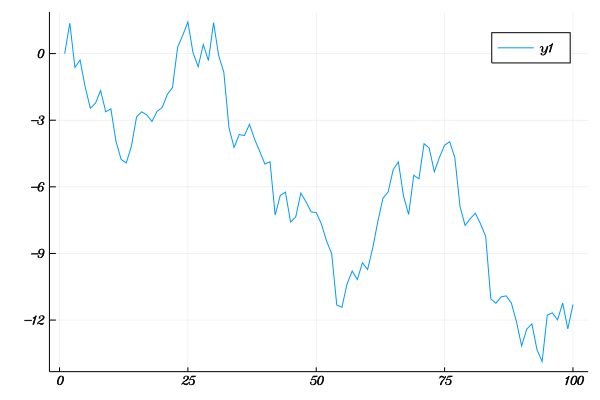

In [8]:
plot(random_walk1d(100))

### random_walk2d

In [9]:
function random_walk2d(timesteps)
    # φτιάξε έναν timesteps x 2 πίνακα
    [random_walk1d(timesteps) random_walk1d(timesteps)]
end

random_walk2d (generic function with 1 method)

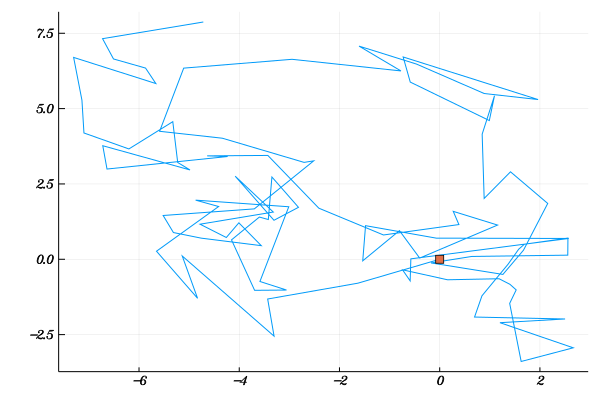

In [36]:
a = random_walk2d(100)
plot(a[:,1], a[:,2], label = :false)
scatter!([(a[1,1], a[1,2])], marker = :square, label = :false)

### random_walkΝd

In [26]:
function random_walkΝd(timesteps,Ν)
    #=
    η συνάρτηση reduce εφαρμόζει επαναληπτικά την συνάρτηση hcat
    στην λίστα. Αυτό έχει ως αποτέλεσμα να μετατραπεί η
    μονοδιάστατη λίστα λιστών σε δισδιάστατο πίνακα όπου
    κάθε στήλη είναι μονοδιάστατος τυχαίος περίπατος.
    =#
    reduce(hcat,[random_walk1d(timesteps) for i in 1:Ν])
end


random_walkΝd (generic function with 1 method)

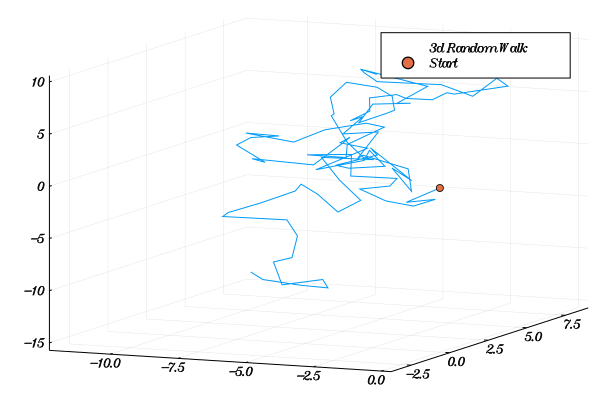

In [46]:
a = random_walkΝd(100, 3)
plot(eachcol(a)..., label = "3d Random Walk")
scatter!([tuple(first.(eachcol(a))...)], label = "Start")

## Διαδικασία Λευκού θορύβου Gauss

In [47]:
function white_noise(timesteps)
    rand(Normal(),timesteps)
end

white_noise (generic function with 1 method)

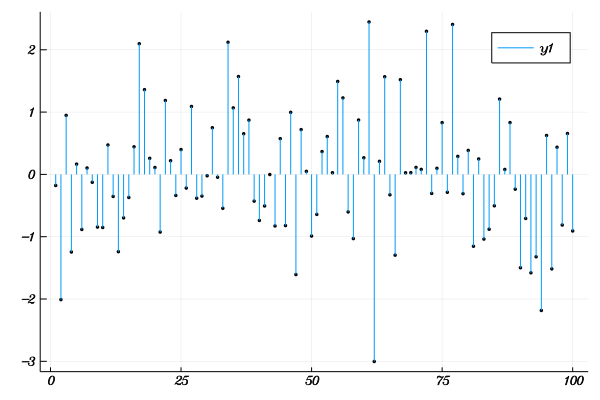

In [50]:
plot(white_noise(100), seriestype = :stem, marker = (:circle, 2, :black))

## Tυχαίος Περίπατος σε Πλέγμα

### lattice_random_walk

In [51]:
function lattice_random_walk(timesteps)
    x = [0] # λίστα των x, ξεκινάει από το 0
    y = [0] # λίστα των y, ξεκινάει από το 0
    for i in 1:timesteps
        # τυχαία ισοπίθανη επιλογή μεταξύ 0 και 1,
        if rand([0,1]) == 0
            # μετακινούμε τον περιπατητή μόνο
            # στον άξονα των x με μοναδιαίο βήμα
            push!(x, x[end] + rand([-1,1]))
            push!(y, y[end])
        else
            # μετακινούμε μόνο στον y
            push!(x, x[end])
            push!(y, y[end] + rand([-1,1]))
        end
    end
    # ενώνουμε τις δύο λίστες σε έναν
    # δισδιάστατο πίνακα με δύο στήλες.
    hcat(x,y)
end

lattice_random_walk (generic function with 1 method)

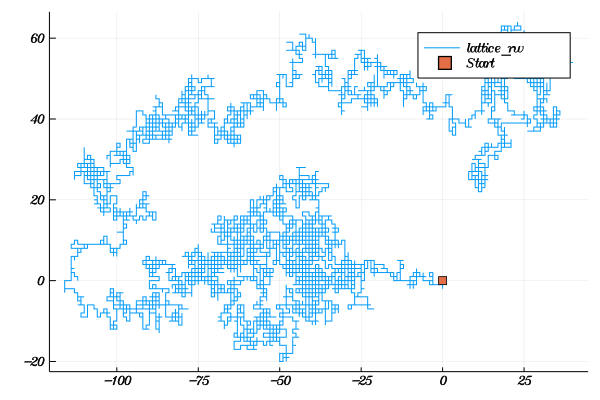

In [58]:
a = lattice_random_walk(10000)
plot(eachcol(a)..., label = :lattice_rw)
scatter!(tuple(a[1,:]...), marker = :square, label = :Start)

### lattice_random_walk_advanced

In [59]:
function lattice_random_walk_advanced(ts)
    #= επιλέγουμε ts φορές μία από
    τις ισοπίθανες κατευθύνσεις =#
    r = rand([[0 1],[0 -1],[1 0],[-1 0]],ts)
    #= πρώτα μετατρέπουμε την λίστα λιστών σε
    δισδιάστατο πίνακα δύο στηλών και μετά
    υπολογίζουμε το σωρευτικό άθροισμα του
    πίνακα ανά γραμμή =#
    cumsum(reduce(vcat,r),dims=1)
end

lattice_random_walk_advanced (generic function with 1 method)

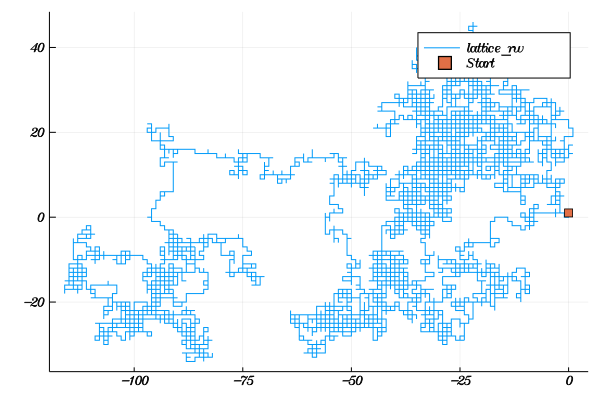

In [60]:
a = lattice_random_walk_advanced(10000)
plot(eachcol(a)..., label = :lattice_rw)
scatter!(tuple(a[1,:]...), marker = :square, label = :Start)

# Διαδικασία Wiener

In [62]:
# Απαραίτητα Πακέτα
using Distributions, Plots

### wiener_process1d_no_scaling

In [64]:
function wiener_process1d_no_scaling(timesteps)
    N = timesteps;
    #= πρώτα δημιουργούμε πίνακα που περιέχει
    τις χρονικές στιγμές των τιμών του τυχαίου
    περιπάτου. Ξεκινώντας από το 0 συνεχίζουμε
    με βήμα 1/Ν μέχρι να έχουμε πίνακα μεγέθους
    N =#
    X = collect(range(0, step = 1/N, length = N));
    #= Έπειτα δημιουργούμε έναν τυχαίο περίπατο ως εξής:
    Τραβάμε N-1 τυχαίους αριθμούς κανονικής κατανομής
    μέσου 0 και απόκλισης 1, υπολογίζουμε το σωρευτικό
    άθροισμα και προσθέτουμε ένα μηδενικό στην πρώτη
    θέση του πίνακα. Με αυτόν τον τρόπο κατασκευάσαμε
    τυχαίο περίπατο μήκους Ν. Αντί για την παρακάτω
    γραμμή θα μπορούσαμε να είχαμε καλέσει τον
    αλγόριθμο random_walk1d(N) =#
    Y = prepend!(cumsum(rand(Normal(0, 1), N-1)), 0);
    # επιστρέφουμε τα X, Y ως πλειάδα (tuple) λιστών
    (X, Y)
end

wiener_process1d_no_scaling (generic function with 1 method)

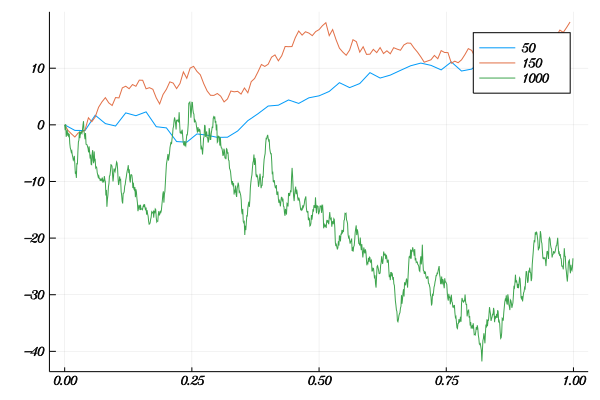

In [73]:
plot(wiener_process1d_no_scaling(50)..., label = :50)
plot!(wiener_process1d_no_scaling(150)..., label = :150)
plot!(wiener_process1d_no_scaling(1000)..., label = :1000)

### wiener_process1d

In [69]:
function wiener_process1d(timesteps)
    N = timesteps;
    #= πρώτα δημιουργούμε πίνακα που περιέχει
    τις χρονικές στιγμές των τιμών του τυχαίου
    περιπάτου. Ξεκινώντας από το 0 συνεχίζουμε
    με βήμα 1/Ν μέχρι να έχουμε πίνακα μεγέθους
    N =#
    X = collect(range(0, step = 1/N, length = N));
    #= Έπειτα δημιουργούμε έναν τυχαίο περίπατο ως εξής:
    Τραβάμε N-1 τυχαίους αριθμούς κανονικής κατανομής
    μέσου 0 και απόκλισης 1, υπολογίζουμε το σωρευτικό
    άθροισμα και προσθέτουμε ένα μηδενικό στην πρώτη
    θέση του πίνακα. Με αυτόν τον τρόπο κατασκευάσαμε
    τυχαίο περίπατο μήκους Ν. Αντί για την επόμενη
    γραμμή θα μπορούσαμε να είχαμε καλέσει τον
    αλγόριθμο random_walk1d(N) =#
    Y = prepend!(cumsum(rand(Normal(0, 1), N-1)), 0);
    #= κλιμάκωση του τυχαίου περιπάτου έτσι ώστε
    να διατηρηθεί η γραμμική αύξηση της διακύμανσης
    στον χρόνο =#
    Y = Y / sqrt(N);
    # επιστρέφουμε τα X, Y ως πλειάδα (tuple)
    (X, Y)
end

wiener_process1d (generic function with 1 method)

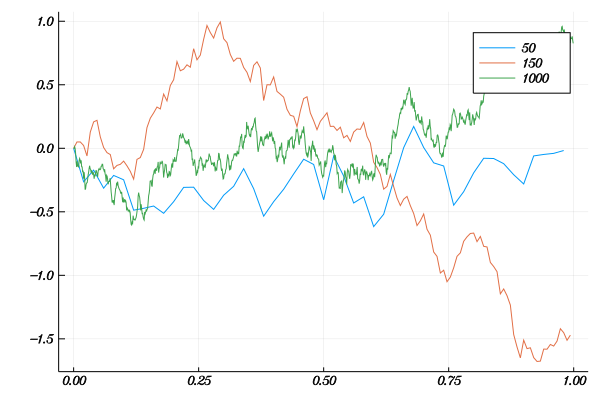

In [71]:
plot(wiener_process1d(50)..., label = :50)
plot!(wiener_process1d(150)..., label = :150)
plot!(wiener_process1d(1000)..., label = :1000)

## Γενικευμένη Κίνηση Brown

### extended_brownian_motion1d

In [74]:
function extended_brownian_motion1d(x₀, μ, σ, timesteps)
    N = timesteps;
    #= χρησιμοποιούμε την κανονική διαδικασία Wiener
    που δημιουργήσαμε σε προηγούμενο αλγόριθμο.
    Επιστρέφει το Χ που είναι πίνακας με τους χρόνους
    των τιμών, και το Υ που είναι πίνακας με τις
    τιμές της διαδικασίας =#
    (X, Y) = wiener_process1d(N);
    #= Μετασχηματίζουμε τη διαδικασία Wiener
    σύμφωνα με την εξίσωση που αναφέραμε.
    Η συνάρτηση enumerate παίρνει μία λίστα Χ και
    επιστρέφει μία πλειάδα λιστών όπου η πρώτη λίστα
    είναι οι δείκτες της Χ και η δεύτερη οι τιμές της =#
    B = [x₀ + μ * t + σ * Y[i] for (i, t) in enumerate(X)];
    #= επιστρέφουμε τις τιμές όπως και στον αλγόριθμο
    της διαδικασίας Wiener =#
    (X, B)
end

extended_brownian_motion1d (generic function with 1 method)

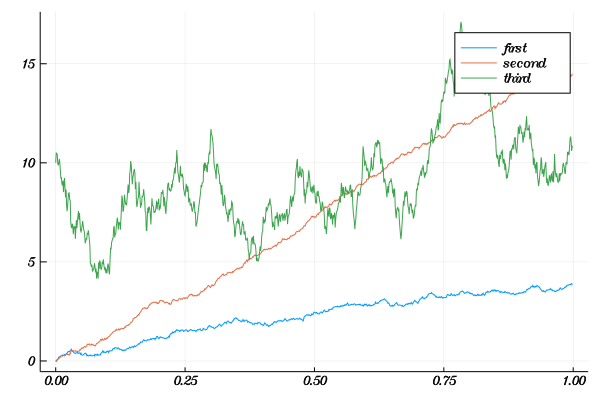

In [80]:
plot(extended_brownian_motion1d(0, 5, 1, 1000)..., lab = :first)
plot!(extended_brownian_motion1d(0, 15, 1, 1000)..., lab = :second)
plot!(extended_brownian_motion1d(10, 15, 10, 1000)..., lab = :third)

## Γεωμετρική Κίνηση Brown

### geometric_brownian_motion1d

In [77]:
function geometric_brownian_motion1d(S₀, μ, σ, timesteps)
    N = timesteps;
    #= χρησιμοποιούμε την γενικευμένη κίνηση brown
    που δημιουργήσαμε σε προηγούμενο αλγόριθμο.
    Επιστρέφει το Χ που είναι πίνακας με τους χρόνους
    των τιμών, και το Υ που είναι πίνακας με τις
    τιμές της διαδικασίας =#
    (X, Y) = extended_brownian_motion1d(0, μ, σ, N);
    #= μετασχηματίζουμε την γενικευμένη κίνηση Brown
    σύμφωνα με την εξίσωση της γεωμετρικής κίνησης=#
    S = S₀ * exp.(Y);
    #= επιστρέφουμε τις τιμές όπως και στον αλγόριθμο
    της γενικευμένης κίνησης brown =#
    (X, S)
end


geometric_brownian_motion1d (generic function with 1 method)

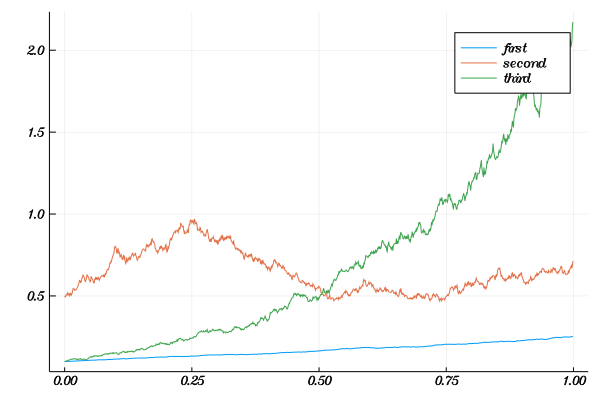

In [81]:
plot(geometric_brownian_motion1d(0.1, 1, 0.1, 1000)..., lab = :first)
plot!(geometric_brownian_motion1d(0.5, 1, 0.5, 1000)..., lab = :second)
plot!(geometric_brownian_motion1d(0.1, 3, 0.5, 1000)..., lab = :third)

# Κατανομή & Διαδικασία Poisson

In [ ]:
using Plots

## poisson_point_process

In [82]:
function poisson_point_process(λ, τ₀, τ)
    #= φτιάχνουμε πίνακα με floats που θα αποθηκεύει τους χρόνους
    των γεγονότων =#
    times::Array{Float64, 1} = [0.]
    while true # συνεχόμενη επανάληψη
        #= υπολογισμός διαφοράς χρόνων με χρήση της συνάρτησης
        rand και την εκθετική κατανομή, χρησιμοποιούμε 1/λ σαν
        παράμετρο της κατανομής καθώς σε αυτή το λ λειτουργεί
        αντίθετα από ότι με την κατανομή Poisson. Δηλαδή στην
        κατανομή Poison λ = λ, ενώ σε αυτή την υλοποιήση της
        εκθετικής κατανομής λ = 1 / λ =#
        interevent = rand(Exponential(1/λ))
        # εφόσον δεν έχουμε ξεπεράσει το χρονικό όριο
        if times[end] + interevent < τ
            #= πρόσθεσε στο προηγούμενο χρόνο την διαφορά και
            αποθήκευσε το αποτέλεσμα στο τέλος του πίνακα =#
            push!(times, times[end] + interevent)
        else # σταμάτα όταν ξεπεράσουμε το χρονικό όριο
            break
        end
    end
    times # επιστρέφουμε τον πίνακα με τους χρόνους
end


poisson_point_process (generic function with 1 method)

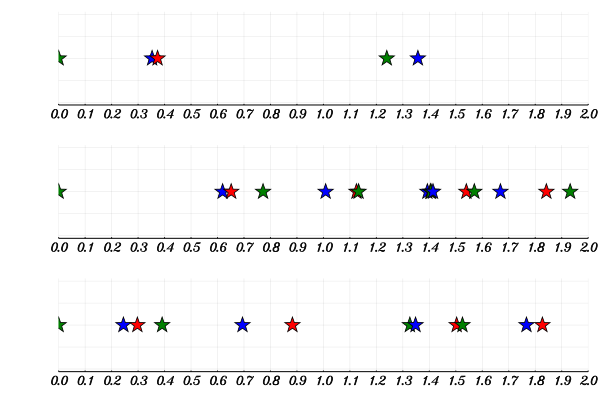

In [87]:
let τ₀ = 0, τ = 2, λ = 2:4:10
    times = poisson_point_process.(λ, τ₀, τ)
    plots = @. scatter(times, fill(0.5, length(times)), yaxis = 0:1, xaxis = 0:0.1:τ, xlims = (0,τ), marker = (:star, 8, [:green, :blue, :red]), label = :none)
    yaxis!.(plots, false)
    plot(plots..., layout = (3,1))
end

### poisson_point_process_transform

In [88]:
function poisson_point_process_transform(λ, τ₀, τ)
    #= φτιάχνουμε πίνακα με floats που θα αποθηκεύει τους χρόνους
    των γεγονότων =#
    times::Array{Float64, 1} = [0.]
    while true # συνεχόμενη επανάληψη
        #= υπολογισμός διαφοράς χρόνων με χρήση της συνάρτησης
        rand και του inverse transform sampling =#
        interevent = (-log(rand())) / λ
        # εφόσον δεν έχουμε ξεπεράσει το χρονικό όριο
        if times[end] + interevent < τ
            #= πρόσθεσε στο προηγούμενο χρόνο την διαφορά και
            αποθήκευσε το αποτέλεσμα στο τέλος του πίνακα =#
            push!(times, times[end] + interevent)
        else # σταμάτα όταν ξεπεράσουμε το χρονικό όριο
            break
        end
    end
    times # επιστρέφουμε τον πίνακα με τους χρόνους
end


poisson_point_process_transform (generic function with 1 method)

# Διαδικασία Ornstein-Uhlenbeck

In [ ]:
using Plots

In [90]:
function ornstein_uhlenbeck_process(total_time, dt, x₀, μ, σ, θ)
    #= υπολογίζουμε πόσα συνολικά βήματα θα κάνουμε και
    χρησιμοποιούμε την συνάρτηση floor για να αποφύγουμε δεκαδικό
    αριθμό βημάτων =#
    total_steps = floor(Int64, total_time / dt)
    # δημιουργούμε πίνακα με τους χρόνους των βημάτων
    X = range(0, step = dt, length = total_steps) |> collect
    #= δημιουργούμε άδειο πίνακα για να αποθηκεύσουμε τις τιμές
    της διαδικασίας στους χρόνους Χ =#
    Y = Array{Float64, 1}(undef, total_steps)
    Y[1] = x₀ # θέτουμε την αρχική τιμή της διαδικασίας
    for i = 2:total_steps # για κάθε ένα από τα υπόλοιπα βήματα
        #= υπολογίζουμε το επόμενο βήμα σύμφωνα με την εξίσωση,
        το προσθέτουμε στο προηγούμενο, αποθηκεύουμε στην
        κατάλληλη i-οστή θέση του πίνακα τιμών Y =#
        new_step = θ * (μ - Y[i-1]) * dt + sqrt(dt) * σ *
        rand(Normal(0, 1))
        Y[i] = Y[i-1] + new_step
    end
    (X, Y) # επιστρέφουμε πλειάδα (tuple) των χρόνων και των τιμών
end


ornstein_uhlenbeck_process (generic function with 1 method)

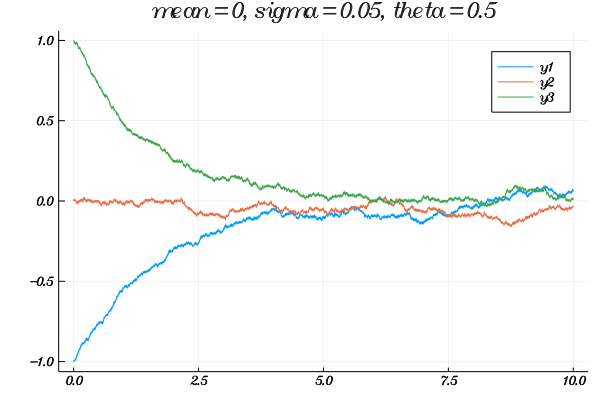

In [91]:
let total_time = 10, dt = 0.001, x₀ = [-1, 0, 1], μ = 0, σ = 0.05, θ = 0.5    
    (X1, Y1) = ornstein_uhlenbeck_process(total_time, dt, x₀[1], μ, σ, θ)
    (X2, Y2) = ornstein_uhlenbeck_process(total_time, dt, x₀[2], μ, σ, θ)
    (X3, Y3) = ornstein_uhlenbeck_process(total_time, dt, x₀[3], μ, σ, θ)

    plot(X1, [Y1, Y2, Y3], title = "mean = $μ, sigma = $σ, theta = $θ")
end

# Το Μοντέλο Olami-Feder-Christensen για Σεισμούς

In [2]:
# Απαραίτητα Πακέτα
using Distributions, ImageFiltering, Plots

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260
┌ Info: Precompiling ImageFiltering [6a3955dd-da59-5b1f-98d4-e7296123deb5]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [3]:
function ofc(N, timesteps, force_increment, α)
    #= δημιουργούμε το αρχικό πλέγμα κελιών, το πλήθος των κελιών
    είναι N*N, η ενέργεια του κάθε κελιού αρχικοποιείται στο 0 =#
    grid = zeros(N, N)
    #= δημιουργούμε δισδιάστατο πίνακα με τις οριακές τιμές
    ενέργειας, υποθέτουμε ότι οι τιμές αυτές ακολουθούν ομοιόμορφη
    κατανομή μεταξύ [1,5]. Αυτή η υπόθεση είναι υπόθεση εργασίας
    και μπορεί να διαφέρει ανάλογα την εφαρμογή.=#
    critical_values = rand(Uniform(1,5), N, N)
    #= δημιουργούμε έναν μονοδιάστατο πίνακα μήκους timesteps
    που σε κάθε θέση του θα περιέχει τον αριθμό των κελιών που
    ξεπέρασαν την ορικακή τους ενέργεια (έγιναν excited) την
    τρέχουσα χρονική στιγμή. Δηλαδή στη θέση 1 του πίνακα θα
    υπάρχει ο αριθμός των κελιών που έγιναν excited τη χρονική
    στιγμή 1. =#
    excited_cells = Array{Int64, 1}(undef, timesteps)
    #= επανάληψη για κάθε χρονική στιγμή =#
    for timestep in 1:timesteps
        #= αυξάνουμε την ενέργεια του πλέγματος λόγω της κίνησης
        τις άνω πλάκας =#
        grid .+= force_increment
        #= αφαιρούμε τον πίνακα grid από τον πίνακα
        critical_values, αυτό θα μας δείξει εάν κάποιο κελί
        έχει φτάσει ή ξεπεράση την ενεργειακή του τιμή. =#
        check_excited = critical_values .- grid
        #= βάζουμε 1 στα κελιά που έχουν γίνει excited και 0
        στα υπόλοιπα στον πίνακα check_excited =#
        replace!(x -> x <= 0 ? 1 : 0, check_excited)
        #= αθροίζουμε όλα τα στοιχεία του πίνακα check_excited
        ώστε να αποκτήσουμε τον συνολικό αριθμό των excited
        κελιών. Η μεταβλητή no_of_excited θα περιέχει
        τον αριθμό των excited κελιών κάθε βήματος. =#
        no_of_excited = sum(check_excited)
        # επανέλαβε όσο υπάρχουν excited κελιά
        while sum(check_excited) > 0
            #= η παρακάτω γραμμή εφαρμόζει τη διάχυση ενέργειας
            που περιγράφηκε στο κείμενο, χρησιμοποιεί την
            συνάρτηση imfilter του πακέτου ImageFiltering.
            Η διαδικασία που εφαρμόζουμε ονομάζεται μαθηματικά
            Convolution ή Συνέλιξη, δεν θα την αναλύσουμε
            περαιτέρω για λόγους συντομίας =#
            grid += imfilter(grid .* check_excited,
                        centered([0 α 0;
                                  α -1 α;
                                  0 α 0]),
                        Fill(zero(eltype(grid)), (1, 1)));
            #= οι επόμενες δύο γραμμές ελέγχουν την ύπαρξη
            excited κελιών όπως περιγράφηκε παραπάνω =#
            check_excited = critical_values .- grid
            replace!(x -> x <= 0 ? 1 : 0, check_excited)
            #= αυξάνουμε τον αριθμό των κελιών που έγιναν
            excited σε αυτό το χρονικό βήμα =#
            no_of_excited += sum(check_excited)
        end
        #= τοποθέτηση στη θέση timestep τον αριθμό των κελιών που
        έγιναν excited σε αυτό το χρονικό βήμα =#
        excited_cells[timestep] = no_of_excited
    end
    #= επέστρεψε τον πίνακα που περιέχει τον αριθμό των κελιών που
    έγιναν excited σε κάθε χρονικό βήμα =#
    excited_cells
end

ofc (generic function with 1 method)

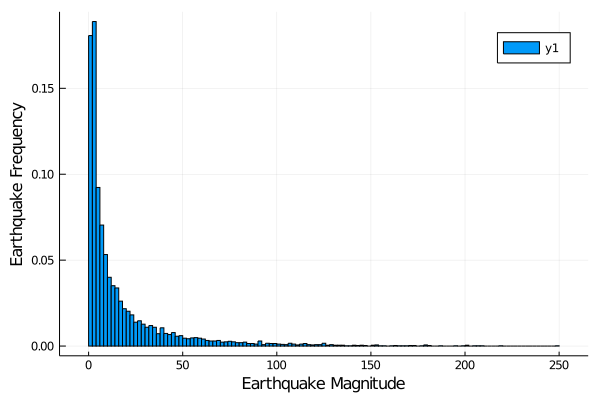

In [4]:
let N = 20, timesteps = 10000, force_increment = 0.005, α = 0.24
    results = filter(x->x!=0, ofc(N, timesteps, force_increment, α))
    histogram(results, xlabel = "Earthquake Magnitude", ylabel = "Earthquake Frequency", normalize = :probability)
end